In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

In [3]:
%matplotlib notebook

We can use the FuncAnimation class to animate the function $y = sin(x + \frac{t}{10})$ where $x \in [0, 2\pi]$, and t ranges from 0 to 100 seconds.

<IPython.core.display.Javascript object>


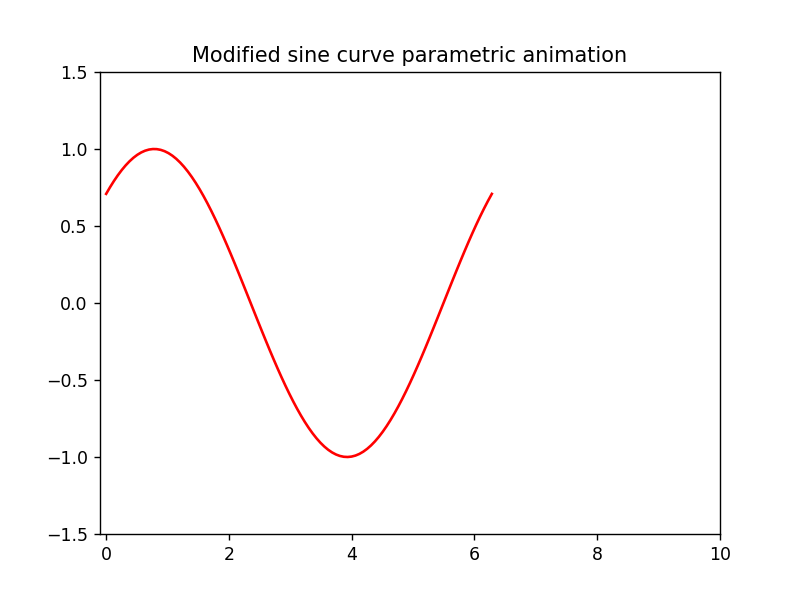

In [4]:
# Define t and x
t = np.linspace(0,100,100)
x = np.linspace(0,2*np.pi,100)

# Initialize the figure and subplot
fig = plt.figure()
ax = fig.add_subplot(111)

# Set plot limits, initialize object to track posisiton
ax.set_xlim((-.1,10))
ax.set_ylim((-1.5,1.5))
position, = plt.plot([],[],color='r')

# Update function to update the animation with respect to t
def update(i):
    position.set_data(x,np.sin(x+.1*t[i]))
    return position

# Define the animation, and show the titled plot
ani = animation.FuncAnimation(fig,update,frames=range(100),interval=25)
plt.title('Modified sine curve parametric animation')
plt.show()

The orbits for Mercury, Venus, Earth, and Mars are stored in the file `orbits.npz`. The file contains four NumPy arrays: `mercury`, `venus`, `earth`, and `mars`. The first column of each array contains the x-coordinates, the second column contains the y-coordinates, and the third column contians the z-coordinates, all relative to the Sun, and expressed in AU (astronomical units, the average distance between Earth and the Sun, approximately 150 million
kilometers).

In [6]:
# Read in the file
orbits = np.load('orbits.npz')

In [7]:
# Get the data for each planet
mercury = orbits['mercury']
venus = orbits['venus']
earth = orbits['earth']
mars = orbits['mars']

<IPython.core.display.Javascript object>


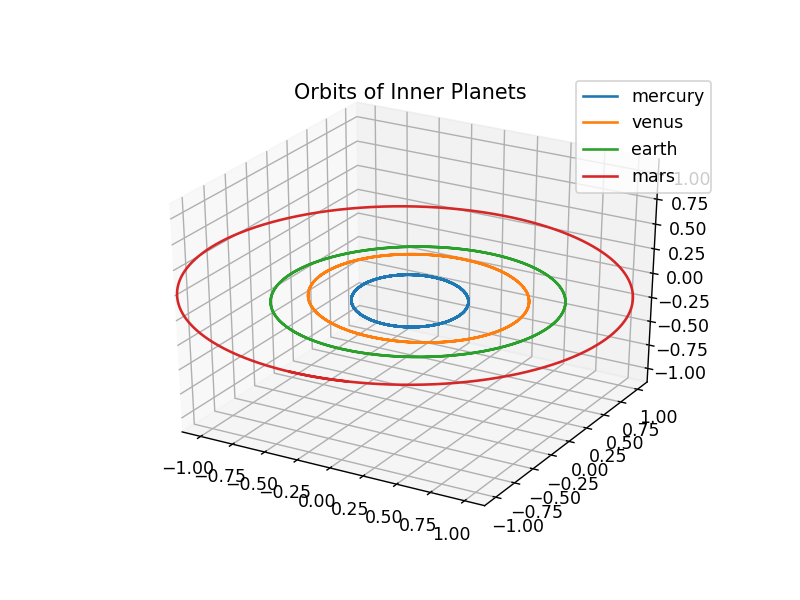

In [8]:
# Initialize the figure, and set plot limits
fig2 = plt.figure()
ax2 = fig2.add_subplot(111,projection='3d')
ax2.set_xlim((-1.1,1.1))
ax2.set_ylim((-1.1,1.1))
ax2.set_zlim((-1.1,1.1))

# Plot the orbits for each of the planets
plt.plot(mercury[:,0],mercury[:,1],mercury[:,2],label='mercury')
plt.plot(venus[:,0],venus[:,1],venus[:,2],label='venus')
plt.plot(earth[:,0],earth[:,1],earth[:,2],label='earth')
plt.plot(mars[:,0],mars[:,1],mars[:,2],label='mars')

# Set the title, and show the plot
plt.title('Orbits of Inner Planets')
plt.legend()
plt.show()

Each row of the arrays in `orbits.npz` gives the position of the planets at a
particular time. The arrays have 1400 points in time over a 700 day period (beginning on 2018-5-30). Create a 3D animation of the planet orbits. Display lines for the trajectories of the orbits and points for the current positions of the planets at each point in time. Your update() function will need to return a list of `Line3D` objects, one for each orbit trajectory and one for each planet position marker. Using `animation.save()`, save your animated plot as "planet_ani.mp4".

To display the mp4 video in the Jupyter Notebook, run the following code in a markdown cell:

`<video src="planet_ani.mp4" controls>`

In [ ]:
# Initialize object to save the animation video
animation.writer = animation.writers['ffmpeg']
plt.ioff()

# Initialize the figure and set plot limits
fig3 = plt.figure()
ax3 = fig3.add_subplot(111,projection='3d')
ax3.set_xlim((-1.1,1.1))
ax3.set_ylim((-1.1,1.1))
ax3.set_zlim((-1.1,1.1))

# Initialize empty objects to store current orbit location
morbit, = plt.plot([],[],[],marker='o',color='r')
vorbit, = plt.plot([],[],[],marker='o',color='b')
eorbit, = plt.plot([],[],[],marker='o',color='g')
maorbit, = plt.plot([],[],[],marker='o',color='m')

# Initialize empty objects to track where the orbit has been
mpast, = plt.plot([],[],[],color='r')
vpast, = plt.plot([],[],[],color='b')
epast, = plt.plot([],[],[],color='g')
mapast, = plt.plot([],[],[],color='m')

# Lists to enable using a for loop in the update function
orbits = [morbit,vorbit,eorbit,maorbit]
pasts = [mpast,vpast,epast,mapast]
planets = [mercury,venus,earth,mars]

# Update function to update the animation
def update3(i):
    for j in range(4):
        orbits[j].set_data(planets[j][i,0],planets[j][i,1])
        orbits[j].set_3d_properties(planets[j][i,2])
        
        pasts[j].set_data(planets[j][:i+1,0],planets[j][:i+1,1])
        pasts[j].set_3d_properties(planets[j][:i+1,2])
        
    return [morbit,vorbit,eorbit,maorbit,mpast,vpast,epast,mapast]

# Set frames equal to the length of mercury to get all the pertinent time epochs
frames3 = len(mercury)

# Render and save the animation
ani3 = animation.FuncAnimation(fig3,update3,frames3,interval=25)
ani3.save('planet_ani_julia.mp4')  

<video src='planet_ani_julia.mp4' controls>

We can make a surface plot of the bivariate normal density function given by:

$$f(\mathbf{x}) = \frac{1}{\sqrt{det(2\pi\Sigma)}}exp[-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^{T}\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})]$$

Where $\mathbf{x} = [x,y]^T \in \mathbb{R}^2$, $\mathbf{\mu} = [0,0]^T$ is the mean vector, and: $$\Sigma = \begin{bmatrix} 1 & 3/5 \\ 3/5 & 2 \end{bmatrix}$$ is the covariance matrix.

In [3]:
import math

<IPython.core.display.Javascript object>


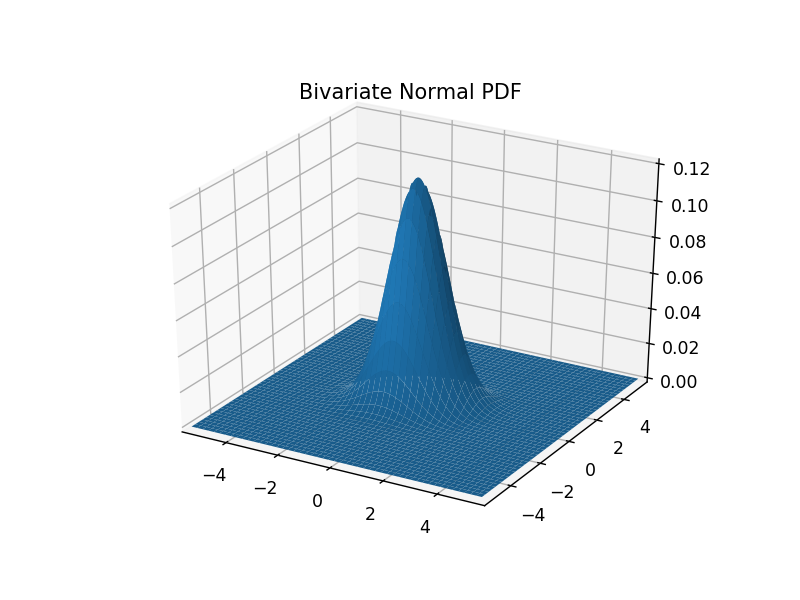

In [4]:
# Initialize sigma, sigma inverse, and the domain
sigma = np.array([[1,3/5],[3/5,2]])
sigma_inv = np.linalg.inv(sigma)
x4 = np.linspace(-5.5,5.5,500)
denom = math.sqrt(np.linalg.det(2*np.pi*sigma))

# Set up the meshgrid
X,Y = np.meshgrid(x4,x4)

# Define bivariate function
f = lambda x,y: (1/denom)*np.exp(-.5*(sigma_inv[0,0]*x**2+(sigma_inv[0,1]+sigma_inv[1,0])*x*y + sigma[1,1]*y**2))                  

# Get the Z coordinates
Z = f(X,Y)

# Plot the 3D figure
fig4 = plt.figure()
ax4 = fig4.add_subplot(111,projection='3d')
ax4.set_xlim((-5.5,5.5))
ax4.set_ylim((-5.5,5.5))
ax4.set_zlim((0,.12))
ax4.plot_surface(X,Y,Z)
plt.title('Bivariate Normal PDF')
plt.show()


We can use the data in vibration.npz to produce a surface animation of the solution
to the wave equation for an elastic rectangular membrane. The file contains three NumPy arrays: `X`, `Y`, `Z`. `X` and `Y` are meshgrids of shape `(300,200)` corresponding to 300 points in
the y-direction and 200 points in the x-direction, all corresponding to a 2x3 rectangle with one corner at the origin. `Z` is of shape `(150,300,200)`, giving the height of the vibrating membrane at each (x,y) point for 150 values of time. In the language of partial differential equations, this is the solution to the following intital/boundary value problem for the wave equation:

$$u_{tt} = 6^2(u_{xx}+u_{yy})$$
$$(x,y) \in [0,2]\times[0,3],t \in [0,5]$$
$$u(t,0,y)=u(t,2,y)=u(t,x,0)=u(t,x,3) = 0$$
$$u(0,x,y) = xy(2-x)(3-y)$$

In [9]:
# Load the data
vibrations = np.load('vibration.npz')

In [10]:
# Get the meshgrids from the data
X5 = vibrations['X']
Y5 = vibrations['Y']
Z5 = vibrations['Z']

In [12]:
# Initialize object to be able to save animation
animation.writer = animation.writers['ffmpeg']
plt.ioff()

# Initialize figure, subplot, and set plot limits
fig5 = plt.figure()
ax5 = fig5.add_subplot(111,projection='3d')
ax5.set_xlim((-.5,2))
ax5.set_ylim((-.5,2))
ax5.set_zlim((-2.5,2.5))

# Update functi
def update5(i):
    ax5.clear()
    ax5.set_xlim((-.5,2))
    ax5.set_ylim((-.5,2))
    ax5.set_zlim((-2.5,2.5))
    ax5.plot_surface(X5,Y5,Z5[i-1])
        
    return ax5
frames5 = 150

ani5 = animation.FuncAnimation(fig5,update5,frames5)
ani5.save('vibration_julia.mp4')  

<video src='vibration_julia.mp4' controls>